In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import warnings
warnings.filterwarnings('ignore')
from statistics import mean
from scipy import stats
from itertools import permutations

In [2]:
tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Palatino"],
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
}

plt.rcParams.update(tex_fonts)

In [3]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


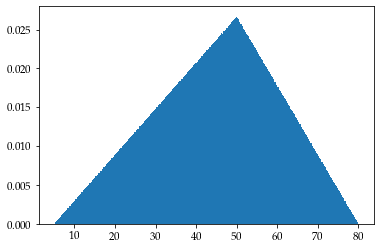

In [12]:
tri = np.random.default_rng().triangular(5, 50, 80, 100000000)
h = plt.hist(tri, bins = 500, density = True)
plt.show()

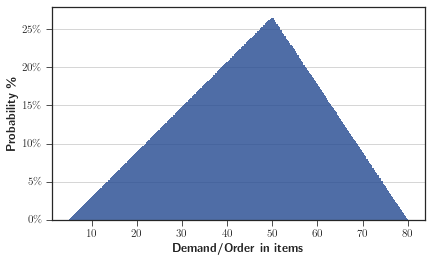

In [36]:
plt.style.use("seaborn-ticks")

fig, ax1 = plt.subplots(1,1, figsize=set_size(445))

ax1.set_ylabel("\\textbf{Probability \%}")
ax1.set_xlabel("\\textbf{Demand/Order in items}")

ax1.set_yticks([0.000, 0.005, 0.010, 0.015, 0.020, 0.025],["$0\%$", "$5\%$", 
                    "$10\%$", "$15\%$", "$20\%$","$25\%$"], rotation=0)

ax1.yaxis.grid(True)
plt.hist(tri, bins = 500, density = True, alpha = 0.8, color="#234990")
fig.tight_layout()
plt.show()
fig.savefig("result_graph/demand_dist.svg", format="svg")

In [19]:
tri_low = np.random.default_rng().triangular(5, 30, 60, 100000000)
tri_high = np.random.default_rng().triangular(25, 70, 100, 100000000)

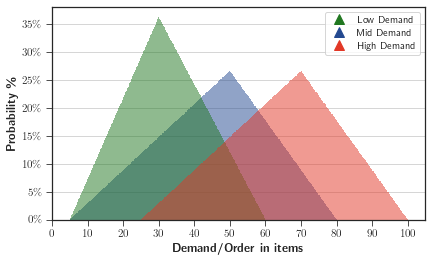

In [42]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

low = mlines.Line2D([], [], color="#207720", marker="^", linestyle='None',
                          markersize=10, label='Low Demand')
mid = mlines.Line2D([], [], color="#234990", marker='^', linestyle='None',
                          markersize=10, label='Mid Demand')
high = mlines.Line2D([], [], color = "#E23726", marker='^', linestyle='None',
                          markersize=10, label='High Demand')


plt.style.use("seaborn-ticks")

fig, ax1 = plt.subplots(1,1, figsize=set_size(445))

ax1.set_ylabel("\\textbf{Probability \%}")
ax1.set_xlabel("\\textbf{Demand/Order in items}")



ax1.hist(tri, bins = 500, density = True, alpha = 0.5, color="#234990")
ax1.hist(tri_low, bins = 500, density = True, alpha = 0.5, color= "#207720")
ax1.hist(tri_high, bins = 500, density = True, alpha = 0.5, color = "#E23726")

ax1.set_yticks([0.000, 0.005, 0.010, 0.015, 0.020, 0.025, 0.030, 0.035],["$0\%$", "$5\%$", 
                    "$10\%$", "$15\%$", "$20\%$","$25\%$","$30\%$", "$35\%$" ], rotation=0)

ax1.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], rotation=0)

loc =plticker.MultipleLocator(base=10)
ax1.xaxis.set_major_locator(loc)

plt.legend(handles=[low, mid, high], loc= "upper right", labelspacing=0.4,
         prop={"size":"small"}, fancybox = True, frameon= True)

ax1.yaxis.grid(True)

fig.tight_layout()
plt.show()
fig.savefig("result_graph/